### Implementing simple chatbot using langgraph


In [6]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph ,START , END

## Reducer
from typing import Annotated
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [2]:
%pip install langchain-groq

from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hello")

Note: you may need to restart the kernel to use updated packages.


AIMessage(content='<think>\nOkay, the user said "Hello." I need to respond appropriately. Let me start by greeting them back in a friendly manner. Maybe add an emoji to keep it warm. Then, offer assistance. Keep it open-ended so they know I\'m here to help with whatever they need. Make sure the response is concise but welcoming. Let me put that together.\n</think>\n\nHi there! 😊 How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 9, 'total_tokens': 98, 'completion_time': 0.172025853, 'prompt_time': 0.000289425, 'queue_time': 0.05779583, 'total_time': 0.172315278}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--eb2a6118-bb7d-4a16-9df8-58c8e271841e-0', usage_metadata={'input_tokens': 9, 'output_tokens': 89, 'total_tokens': 98})

In [9]:
%pip install langchain-openai
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

Note: you may need to restart the kernel to use updated packages.


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

## We Will start with Creating Nodes

In [10]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

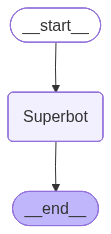

In [12]:
graph=StateGraph(State)

##node
graph.add_node("Superbot",superbot)

## Edges
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

graph_builder=graph.compile()

## Display
from IPython.display import  Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [13]:
graph_builder.invoke({"messages":"Hi,My name is Himanshu  and i like foootball"})

{'messages': [HumanMessage(content='Hi,My name is Himanshu  and i like foootball', additional_kwargs={}, response_metadata={}, id='344873ad-fc55-4731-902c-f341dbe5aef8'),
  AIMessage(content='<think>\nOkay, the user mentioned he likes football. Let me start by acknowledging that. I should ask which team he supports to keep the conversation going. Maybe also ask how he got into football. I need to make sure the response is friendly and open-ended. Oh, and correct the typo in "foootball" to "football" politely. Let me check if there\'s anything else. Maybe mention something about the sport to show interest. Yeah, something like the excitement of matches or famous players. Keep it natural and not too formal. Alright, let me put that together.\n</think>\n\nHey Himanshu! Nice to meet you! 🎉 You mentioned you like football—do you follow any particular team or player? I’d love to hear what got you into the sport! (And no worries about the typo—I know exactly what you meant with "foootball" 😉)

## Streaming The response

In [15]:
for event in graph_builder.stream({"messages":"Hello my name is Himanshu"}):
    print(event)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced himself as Himanshu. I should respond with a friendly greeting in return. I'll ask how I can assist him today. Keep it simple and welcoming.\n</think>\n\nHello Himanshu! Nice to meet you. How can I assist you today? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 15, 'total_tokens': 76, 'completion_time': 0.143395641, 'prompt_time': 0.00063793, 'queue_time': 0.05316622, 'total_time': 0.144033571}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--53080192-c96c-4172-be32-d79cc2dc0d92-0', usage_metadata={'input_tokens': 15, 'output_tokens': 61, 'total_tokens': 76})]}}
